# Abberation mapping workflow 2: Analyze zola results #

*26 Jan 2023 first refactoring*

*07 Sep 2023 updates/troubleshooting*

Originally by Debayan Saha.  Jamie White modified Debayan's notebooks. 

Updating for Jamie's environment on the cluster.

Documenting installation / file locations.

Cleaned-up version of workflow notebook.

## Load packages ##

In [1]:
import glob
import sys
sys.path.append(".")
# sys.path.append('/home/dsaha/.local/lib/python3.7/site-packages/')
from main import *
import warnings
warnings.filterwarnings(action='once')
import seaborn as sns
import pandas as pd
%load_ext autoreload
%autoreload 2
def min_max_norm(arr):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr))

In [2]:
# not needed to run notebook locally.

# %env PATH=/sw/apps/cuda/10.0.130/libnvvp:/sw/apps/cuda/10.0.130/extras/CUPTI/lib64/:/sw/apps/jupyter-tensorboard/0.1.6/bin:/sw/apps/hdf5/1.8.16/bin:/sw/apps/cuda/10.0.130/bin:/sw/bin:/usr/lib64/qt-3.3/bin:/sbin:/bin:/usr/sbin:/usr/bin
# %env LD_LIBRARY_PATH=/sw/apps/hdf5/1.8.16/lib:/sw/apps/cuda/10.0.130/lib64:/sw/apps/cuda/10.0.130/lib:/sw/lib 
# %env MODULEPATH=/sw/apps/modules/modulefiles:/usr/share/Modules/modulefiles:/etc/modulefiles:/lib/modules:/lib/modules/3.10.0-693.21.1.el7.x86_64

# Inputs

In [3]:
# the only thing that needs to be set after running notebook 1
parameter_file = "data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/Parameters.json"

## Load paramters from notebook 01

In [4]:
old_params = setup_param_file(parameter_file, load_mode=True)

unit     = old_params.get('unit') 
abb_list = old_params.get('abb_list')
local = old_params.get('save_dir')
local_data_file_path = old_params.get('save_dir')
lam      = old_params.get('lam')
remote_project_base_path = old_params.get('remote_project_base_path')
image_file =  old_params.get('image_file')
remote_data_file_path = old_params.get("remote_data_file_path")

old_params

{'crop_shape': [40, 40, 40],
 'unit': [0.1, 0.06, 0.06],
 'abb_list': [3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'COMPUTERNAME': 'grill-mac-46.local',
 'thresh_bck': 10,
 'lam': 0.515,
 'thresh_dist': 11.3,
 'fiji_macro': 'zola_macro_cluster_params_passed.ijm',
 'remote_project_base_path': '/home/jwhite/projects/aberration_mapping/',
 'remote_fiji_path': '/home/jwhite/fiji/Fiji.app/ImageJ-linux64',
 'zola_script': 'bashscript_fiji3.sh',
 'image_file': 'data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/beads.tif',
 'remote_data_file_path': '/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/',
 'FIJI_MACRO_PATH': '/projects/project-dsaha/insitu_psf/zola_macro_cluster_1p4.ijm',
 'save_dir': 'data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2',
 'num_folders': 50}

## Construct local folder and file paths

In [5]:
# construct full path to image file and set save directory
local_img_path  = os.path.abspath(f"{image_file}")
local_img_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/beads.tif'

In [6]:
local_base_path: str = f"{os.path.dirname(local_img_path)}/" # everything relative to the notebook directory
local_base_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/'

In [7]:
# file_path and save_dir variables for compatibility
local_data_file_path = f"{os.path.dirname(os.path.abspath(parameter_file))}/"
Local_save_dir  = local_data_file_path
local_data_file_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/'

In [8]:
local_patches_path = f'{local_data_file_path}patches_for_zola/'
local_patches_path

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/patches_for_zola/'

## Check the Fiji macro in use

In [9]:
# old_params['FIJI_MACRO_PATH']
old_params['fiji_macro']

'zola_macro_cluster_params_passed.ijm'

## Check the save directory files

In [10]:
local_save_dir = local_base_path

In [11]:
! ls "{local_save_dir}"

Parameters.json  Results.old.csv  patches_for_zola
Results.csv      beads.tif


## Construct remote filepaths ##

In [12]:
remote_project_base_path

'/home/jwhite/projects/aberration_mapping/'

In [13]:
remote_image_file_path = f"{remote_project_base_path}{image_file}"
remote_image_file_path

'/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/beads.tif'

In [14]:
# remote_fiji_macro_path = f'{remote_project_base_path}{fiji_macro_dir}{fiji_macro}'
# remote_fiji_macro_path

In [15]:
# construct full path to image file and set save directory
remote_img_path  = f"{remote_project_base_path}{image_file}"
remote_img_path

'/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/beads.tif'

In [16]:
# file_path and save_dir variables for compatibility
remote_data_file_path = os.path.dirname(remote_img_path) +'/'
remote_save_dir  = remote_data_file_path
remote_data_file_path

'/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/'

In [17]:
# remote_zola_script_path = f"{remote_project_base_path}{zola_script_dir}{zola_script}"
# remote_zola_script_path

In [18]:
remote_patches_path = f'{remote_data_file_path}patches_for_zola/'
remote_patches_path

'/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/patches_for_zola/'

## Copy the zola files from the remote after processing

In [19]:
remote_zola_raw = f"{remote_patches_path}zola_raw"
remote_zola_raw

'/home/jwhite/projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/patches_for_zola/zola_raw'

In [20]:
local_zola_raw = f"{local_patches_path}zola_raw"
local_zola_raw

'/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/patches_for_zola/zola_raw'

In [21]:
! scp -r falcon:"{remote_zola_raw}" "{local_patches_path}"

planes_12_z_54_y_365_x_1003.json              100%  476    31.8KB/s   00:00    
planes_10_z_53_y_444_x_177.json               100%  473    24.6KB/s   00:00    
planes_12_z_58_y_132_x_1078.json              100%  480    43.8KB/s   00:00    
planes_10_z_56_y_235_x_716.json               100%  479    46.2KB/s   00:00    
planes_14_z_54_y_390_x_109.json               100%  473    41.0KB/s   00:00    
planes_10_z_50_y_975_x_1401.json              100%  483    40.4KB/s   00:00    
planes_12_z_51_y_922_x_1226.json              100%  484    44.9KB/s   00:00    
planes_14_z_53_y_508_x_289.json               100%  476    31.2KB/s   00:00    
planes_12_z_57_y_20_x_735.json                100%  475    13.0KB/s   00:00    
planes_10_z_52_y_429_x_34.json                100%  479    42.1KB/s   00:00    
planes_12_z_52_y_872_x_596.json               100%  472    44.4KB/s   00:00    
planes_14_z_56_y_372_x_144.json               100%  473    21.8KB/s   00:00    
planes_10_z_54_y_496_x_1129.json        

# Load zola and select the stable results

In [22]:
# from main import load_and_select_zola_files
zola_full = load_and_select_zola_files(local_save_dir, lam, headless=False, verbose = False, show_plots=False)

zola_directory: 
/Users/jwhite/Library/Mobile Documents/com~apple~CloudDocs/Science/Grill_Lab/Projects/aberration_mapping/data/andrea/2022_09_06_Beads_0p2_2ndfloorscope_test2/patches_for_zola/

Found 1878 zola files
Processing 1878 files


100%|██████████| 626/626 [00:00<00:00, 35130.71it/s]

NOT Using z_44_y_602_x_429
z_44_y_602_x_429 has a maximum distance of 0.2436006175991664 between all its zola files
Using z_44_y_874_x_480 with rmswe 0.15554950616141466
z_44_y_874_x_480 has a maximum distance of 0.004013476401450504 between all its zola files
Using z_47_y_1034_x_845 with rmswe 0.13209452203642918
z_47_y_1034_x_845 has a maximum distance of 0.003539040848720243 between all its zola files
Using z_47_y_1053_x_1127 with rmswe 0.09218376634733787
z_47_y_1053_x_1127 has a maximum distance of 0.009598283298254563 between all its zola files
Using z_47_y_1082_x_539 with rmswe 0.18599614223004907
z_47_y_1082_x_539 has a maximum distance of 0.013461619980261142 between all its zola files
Using z_48_y_1017_x_669 with rmswe 0.09286713196863788
z_48_y_1017_x_669 has a maximum distance of 0.008491586278700534 between all its zola files
Using z_48_y_1057_x_821 with rmswe 0.08956268322229999
z_48_y_1057_x_821 has a maximum distance of 0.007111587052596407 between all its zola files
Us

In [23]:
len(zola_full)
# zola_full

600

# Filter zola results by neighbors

In [24]:
from main import filter_files_by_med_dist_of_neighbors
print(f"Zola_files before filtering {len(zola_full)}")
med_del_keys = filter_files_by_med_dist_of_neighbors(zola_full)
print(f"Deleting {len(med_del_keys)} points because there medians values are far away from observed values")

# deleting the zola files
[zola_full.pop(x, None) for x in med_del_keys]
print(f"Final number of zola_files after filtering {len(zola_full)}")

Zola_files before filtering 600
Deleting 0 points because there medians values are far away from observed values
Final number of zola_files after filtering 600


# Load corresponding crops

In [25]:
plane_num = 10
crops = {key: tifffile.imread(f"{os.path.dirname(local_data_file_path)}/patches_for_zola/patches*/planes_{plane_num}_{key}.tif") for key in zola_full.keys()}
print(len(zola_full), len(crops))

600 600


# Show the accepted crops

z_44_y_874_x_480 434.0


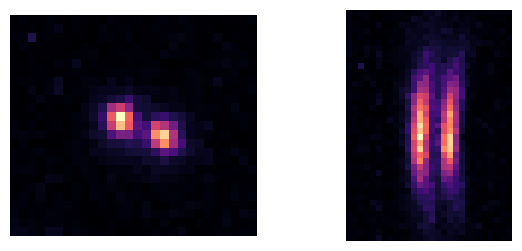

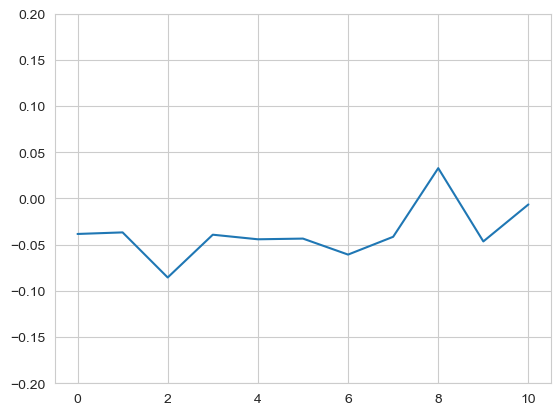

z_47_y_1034_x_845 468.0


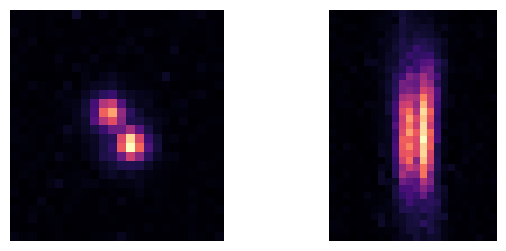

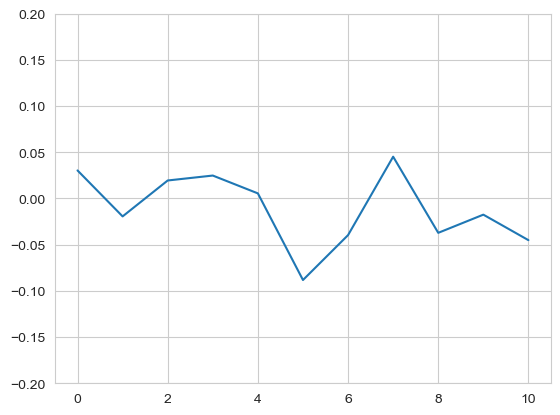

z_47_y_1053_x_1127 458.0


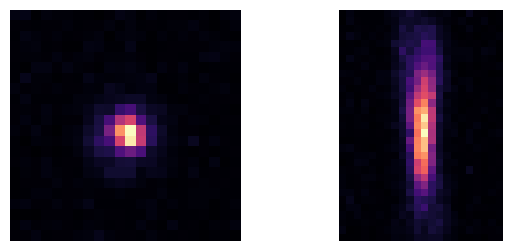

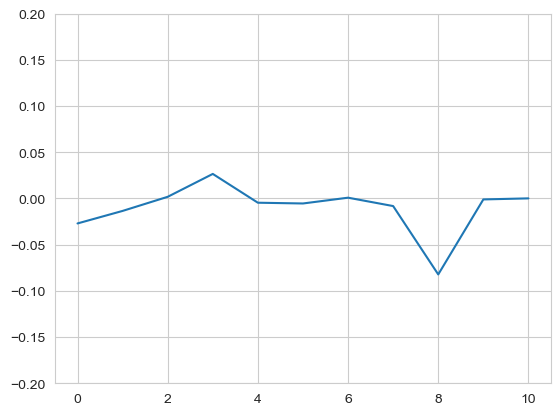

z_47_y_1082_x_539 801.0


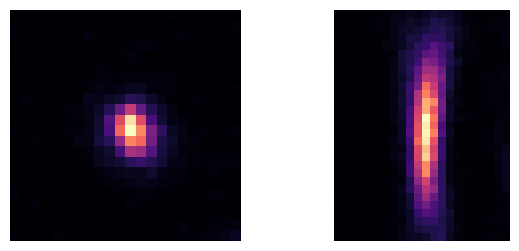

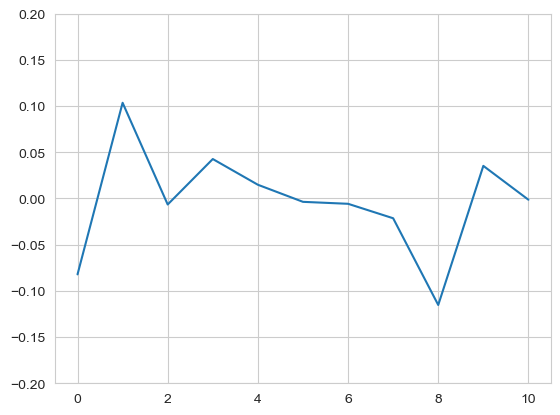

z_48_y_1017_x_669 427.0


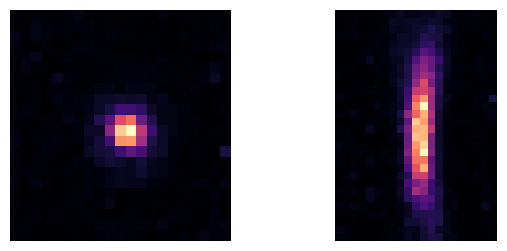

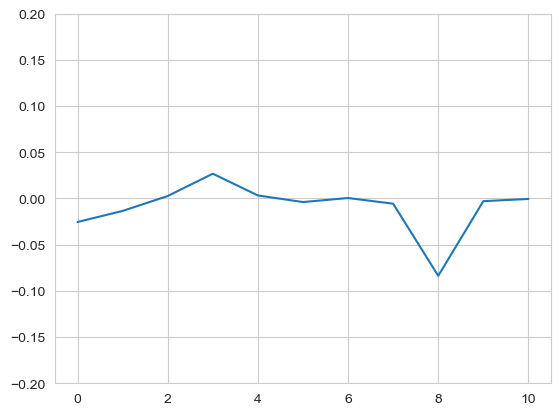

z_48_y_1057_x_821 398.0


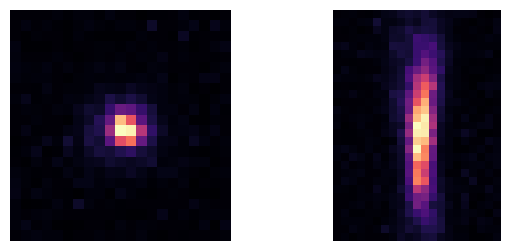

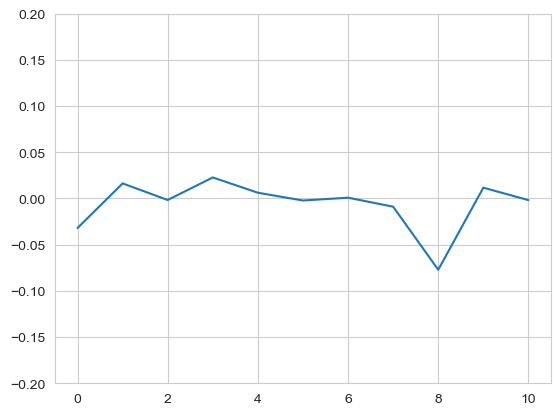

z_48_y_1078_x_138 216.0


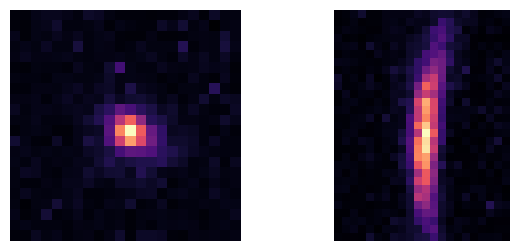

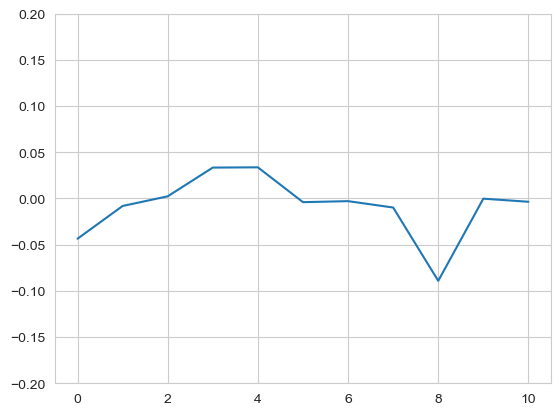

z_48_y_548_x_43 120.0


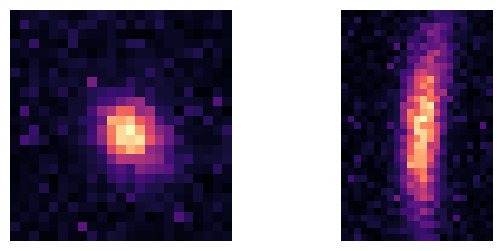

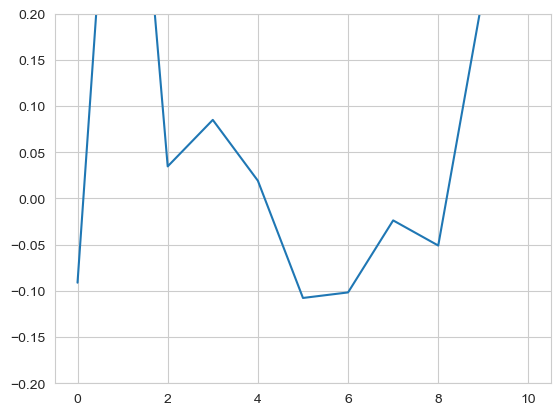

z_48_y_713_x_937 625.0


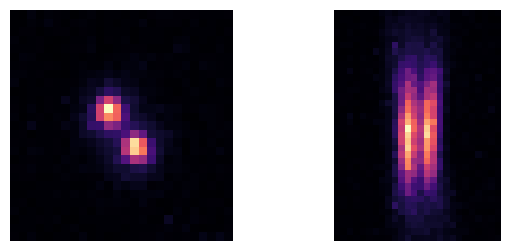

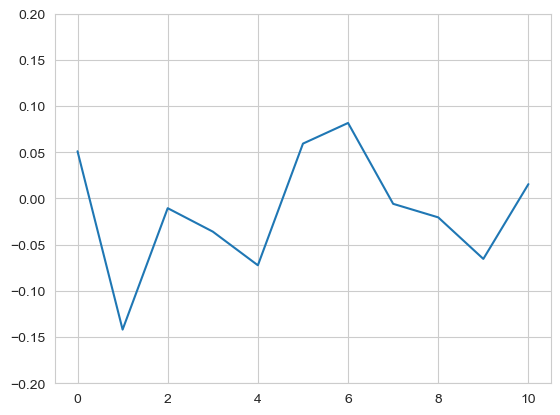

z_48_y_993_x_486 354.0


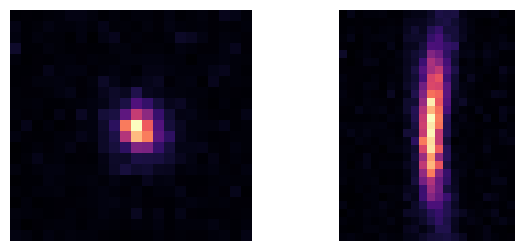

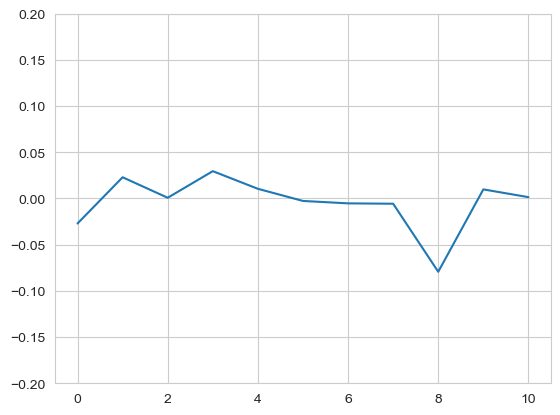

z_49_y_1013_x_301 310.0


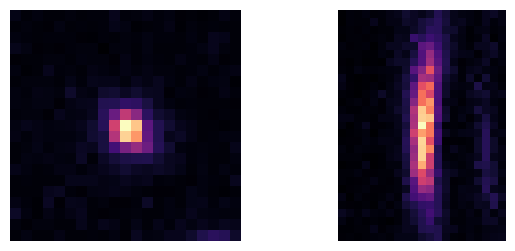

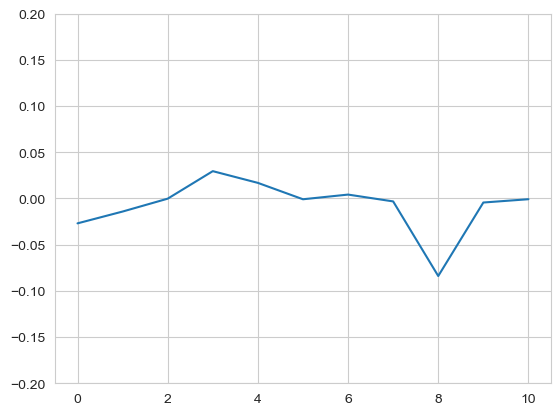

z_49_y_1025_x_309 299.0


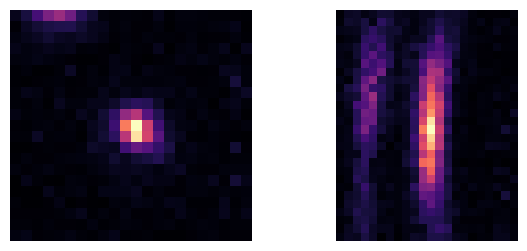

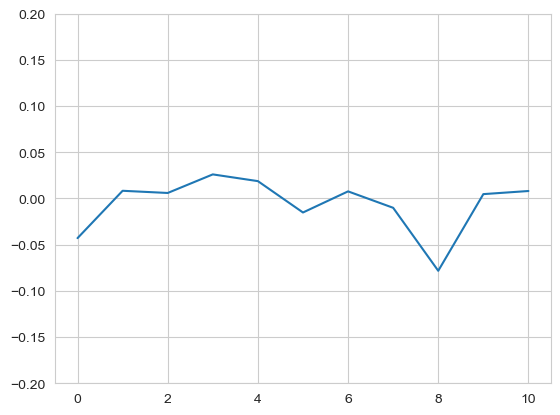

z_49_y_1033_x_448 368.0


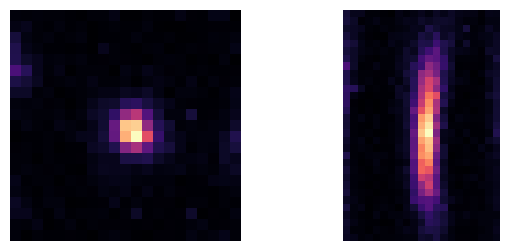

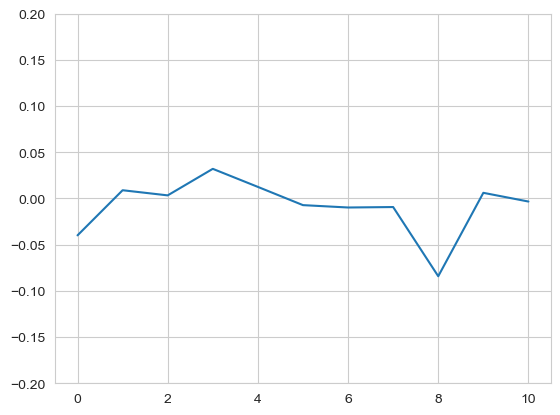

z_49_y_1034_x_827 1315.0


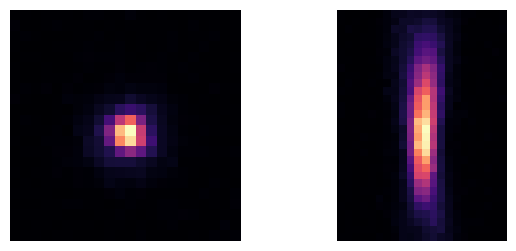

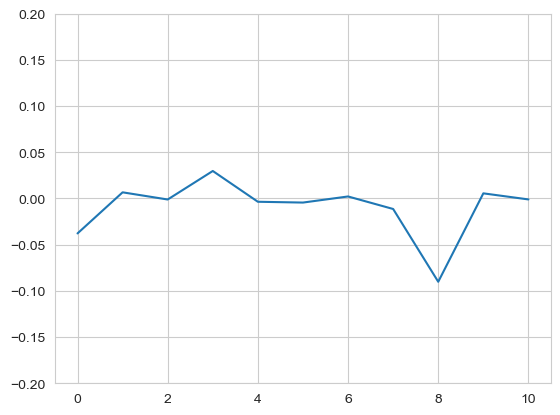

z_49_y_1051_x_1392 382.0


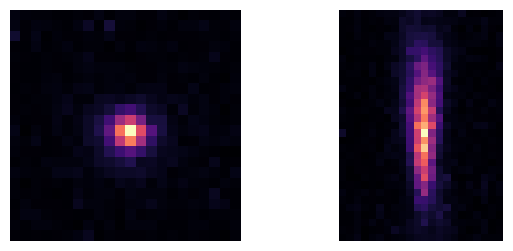

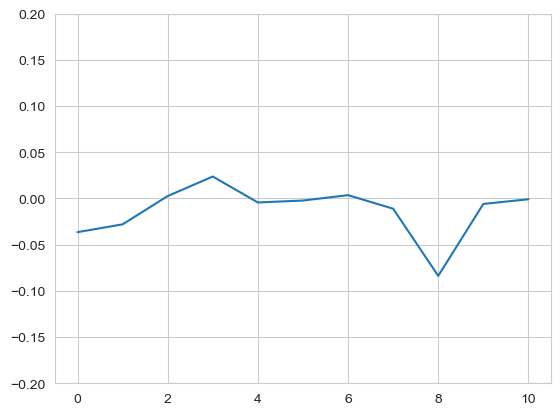

z_49_y_1061_x_243 410.0


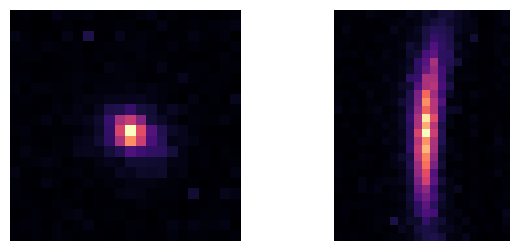

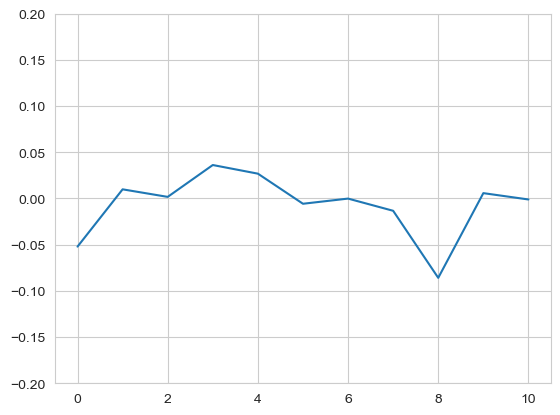

z_49_y_1063_x_1288 442.0


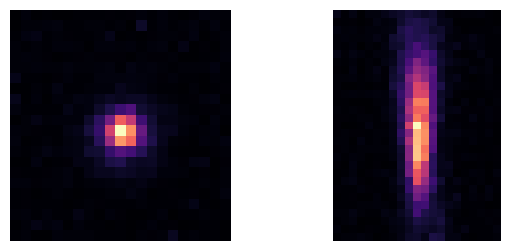

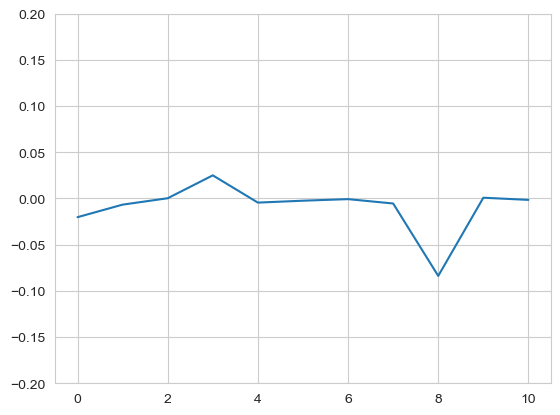

z_49_y_1063_x_346 352.0


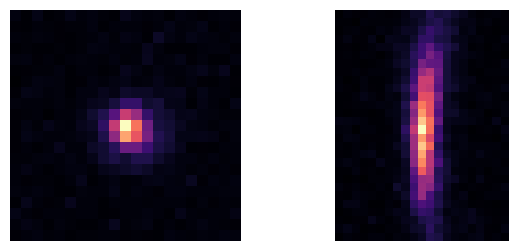

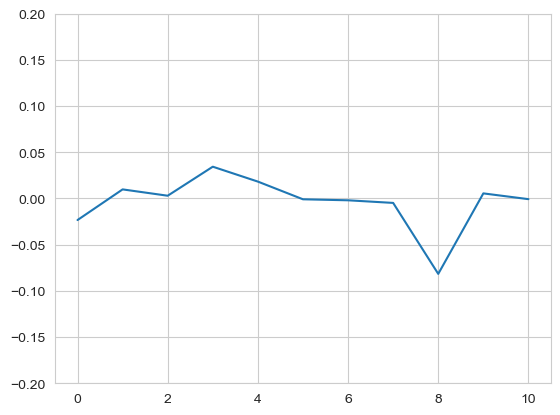

z_49_y_1076_x_49 292.0


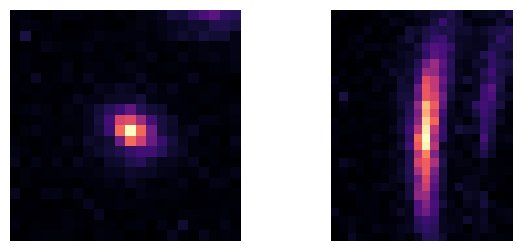

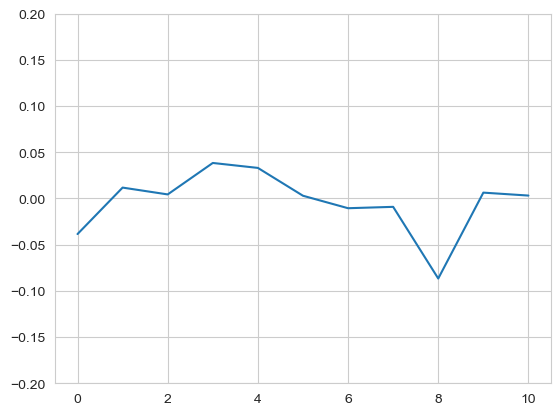

z_49_y_739_x_657 541.0


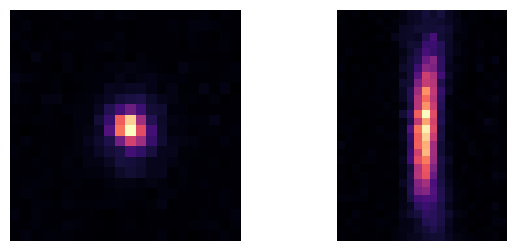

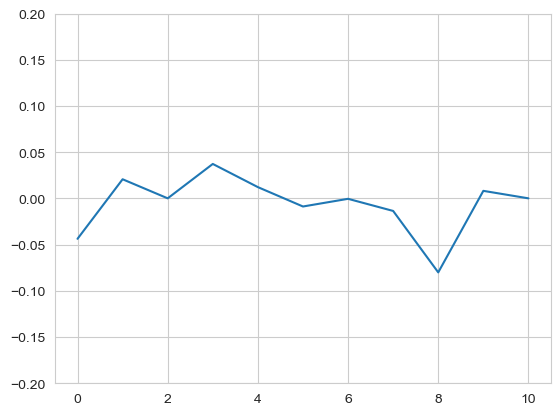

z_49_y_780_x_75 374.0


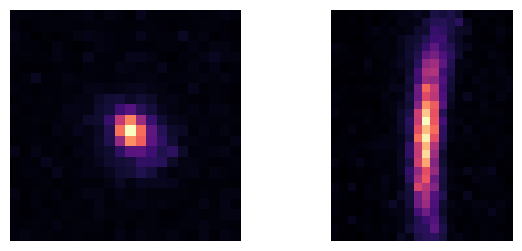

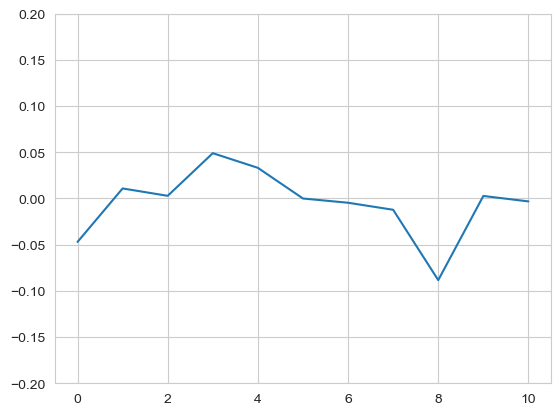

z_49_y_789_x_457 356.0


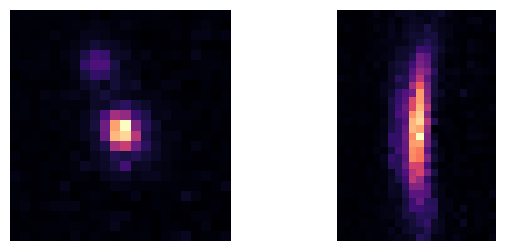

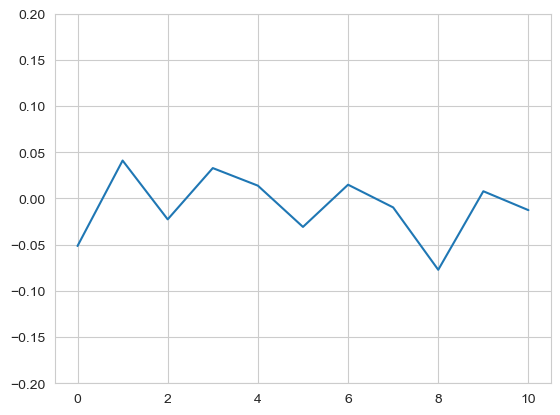

z_49_y_909_x_129 291.0


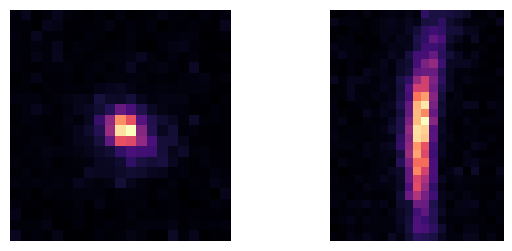

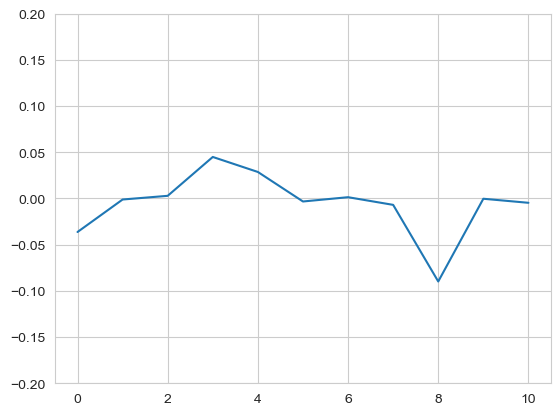

z_49_y_928_x_424 732.0


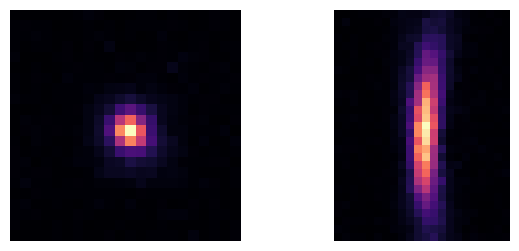

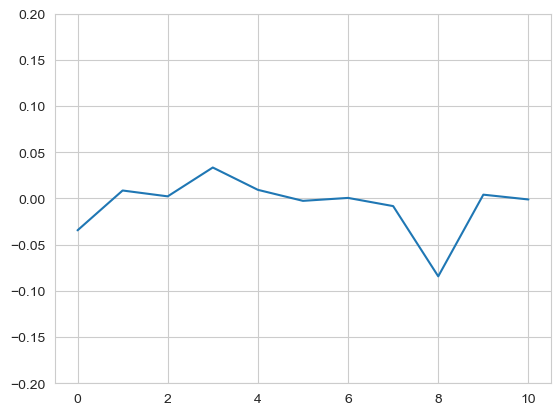

z_49_y_934_x_398 524.0


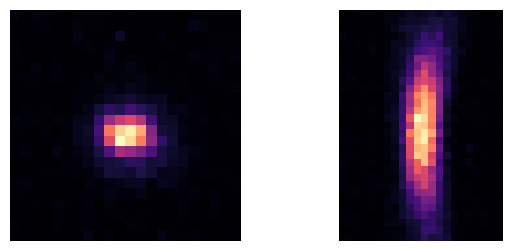

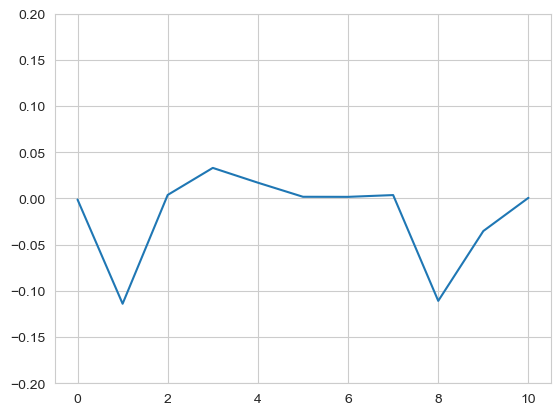

z_49_y_986_x_821 506.0


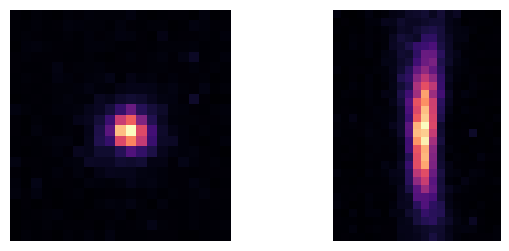

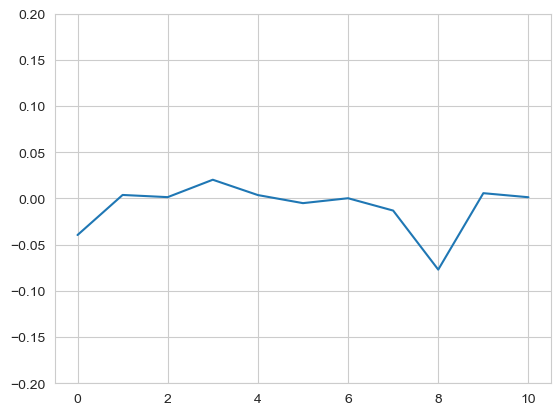

z_50_y_1006_x_91 270.0


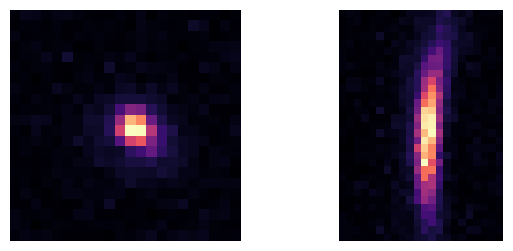

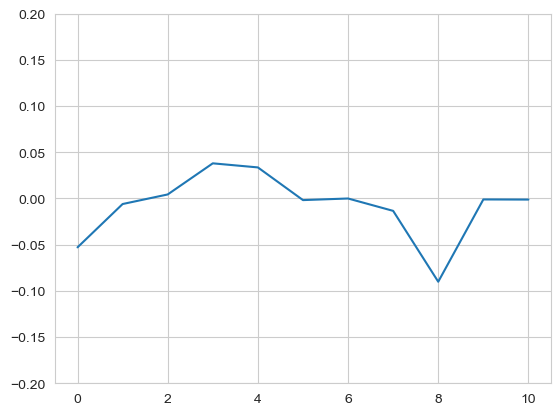

z_50_y_1008_x_38 262.0


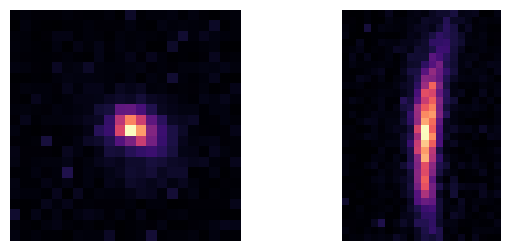

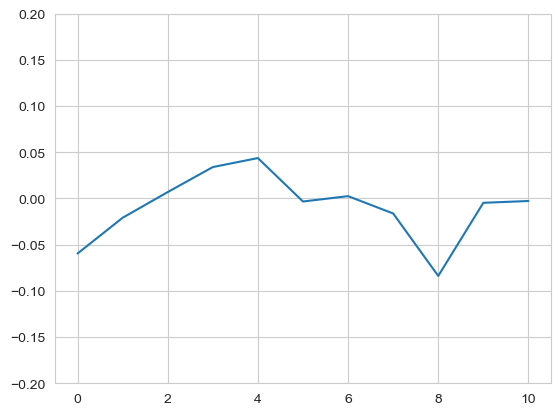

z_50_y_1034_x_460 380.5


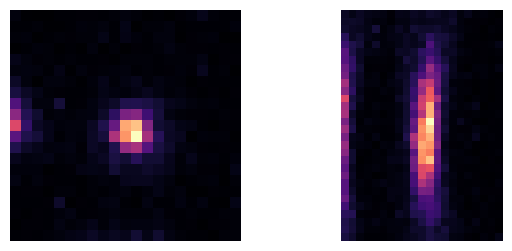

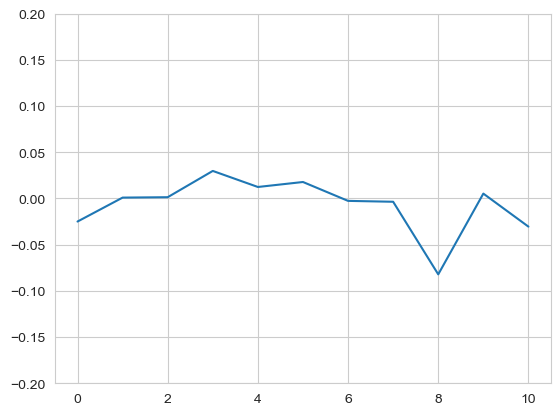

z_50_y_1034_x_781 441.0


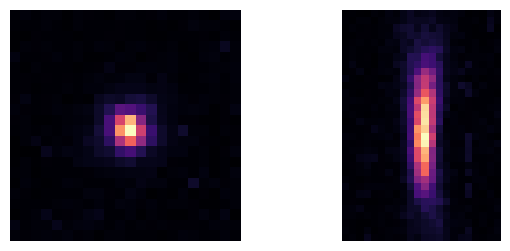

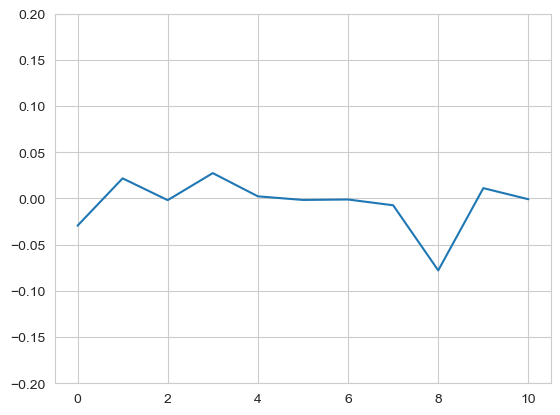

z_50_y_1039_x_433 374.0


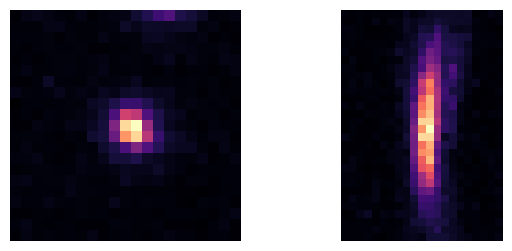

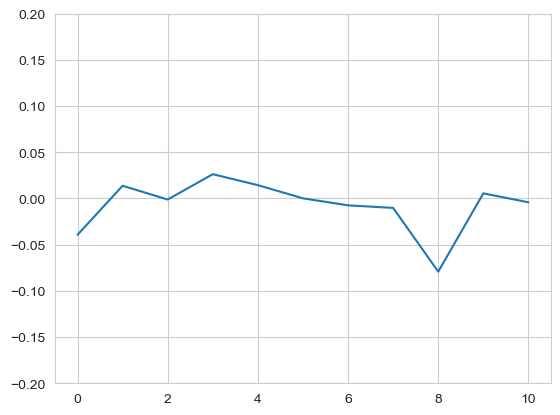

z_50_y_1047_x_329 311.0


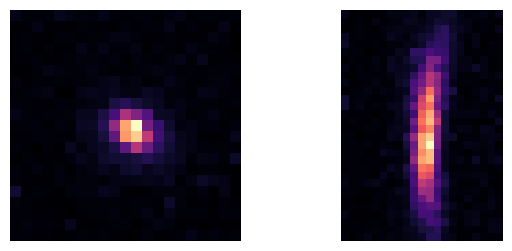

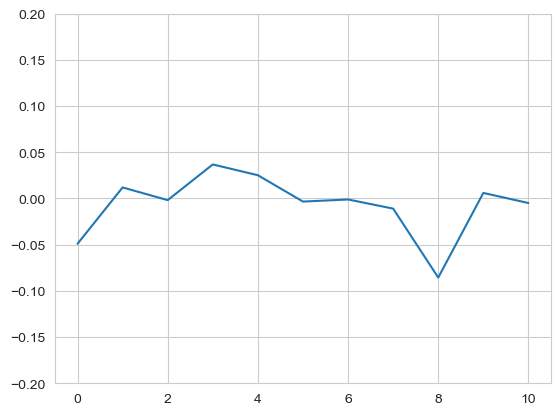

z_50_y_1050_x_557 375.0


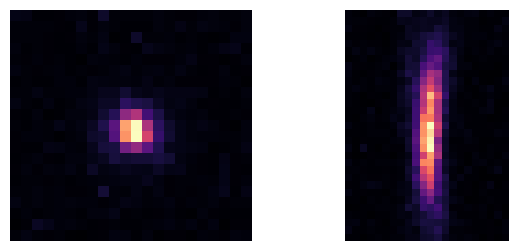

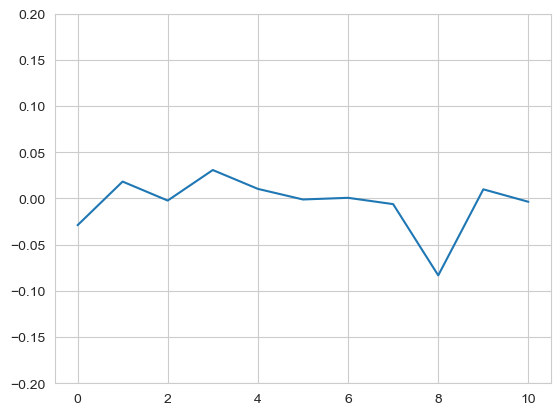

z_50_y_1052_x_413 354.0


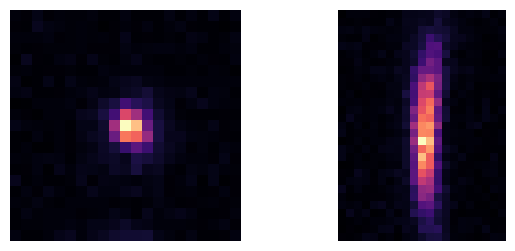

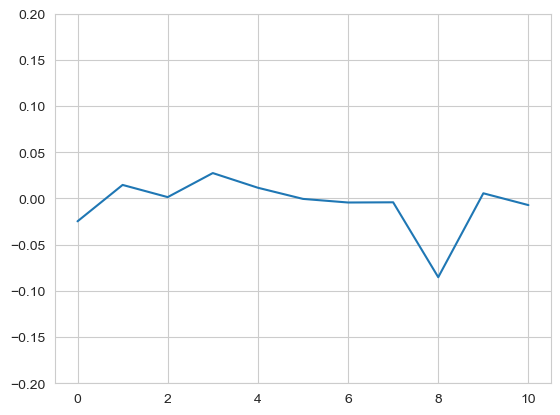

z_50_y_1059_x_432 373.0


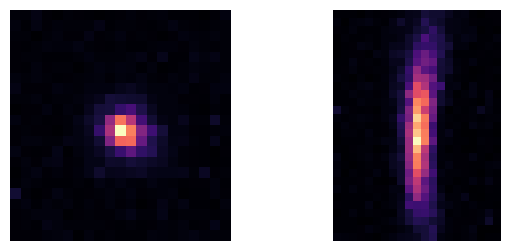

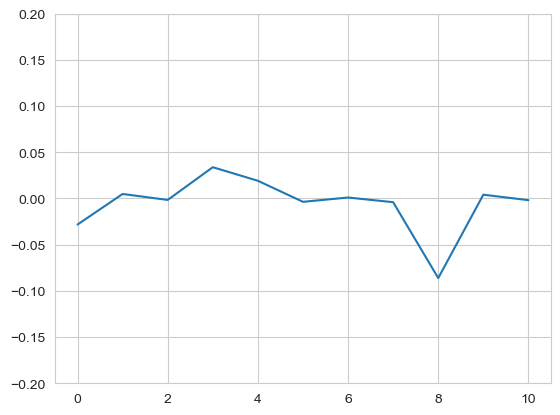

z_50_y_1064_x_413 259.0


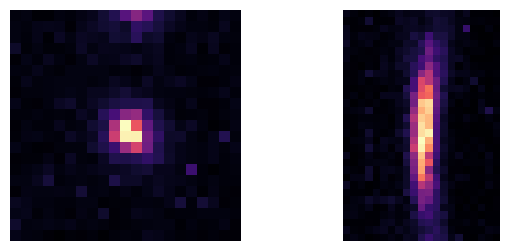

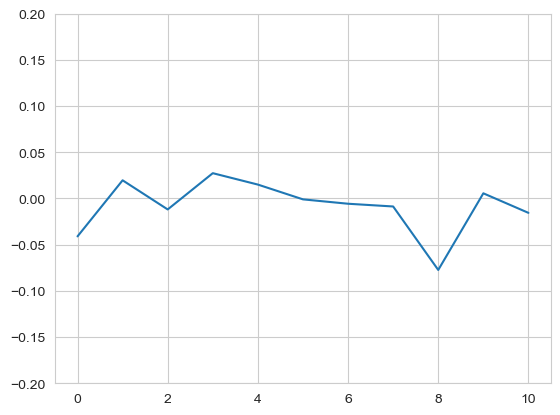

z_50_y_1068_x_1237 453.0


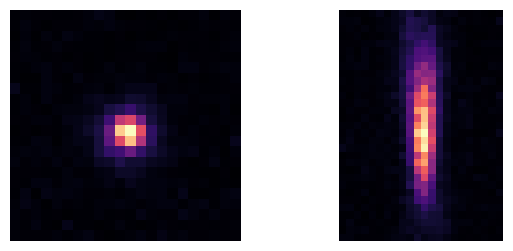

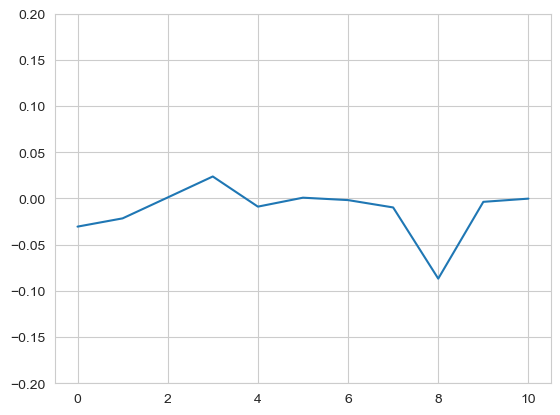

z_50_y_1074_x_1313 418.0


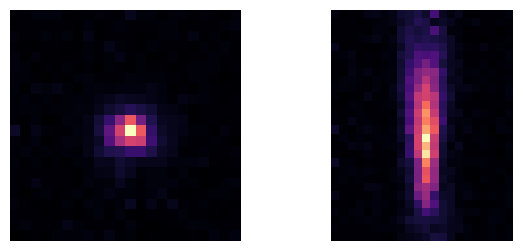

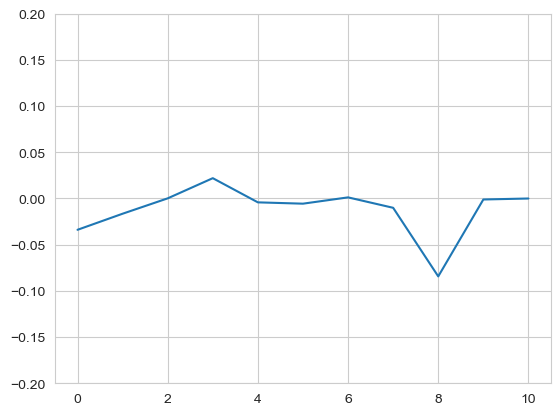

z_50_y_518_x_731 470.0


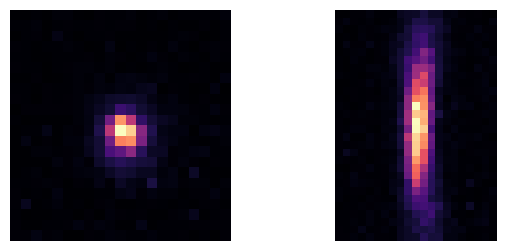

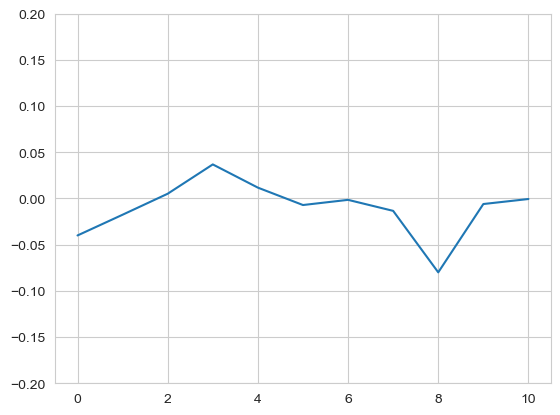

z_50_y_529_x_36 297.0


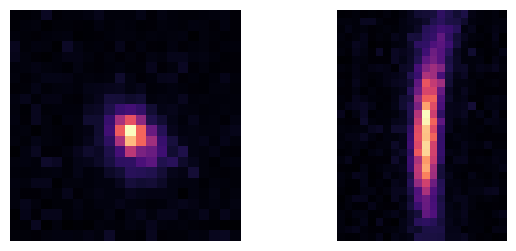

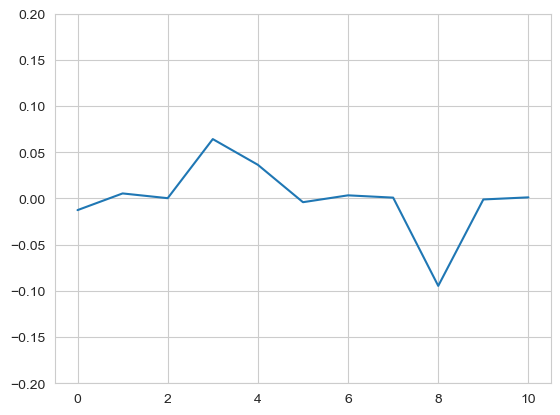

z_50_y_648_x_218 433.0


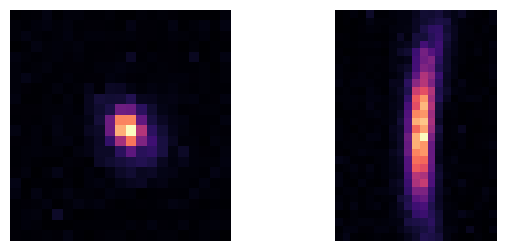

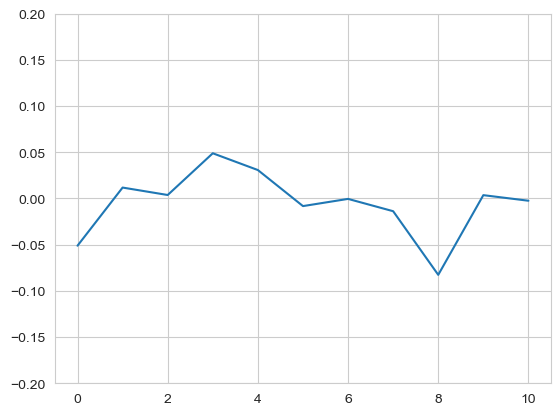

z_50_y_653_x_1340 493.0


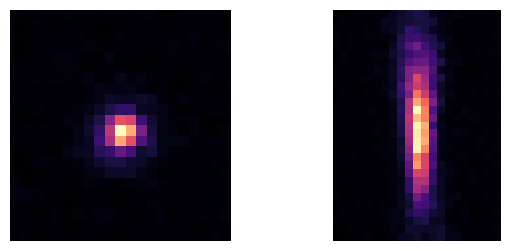

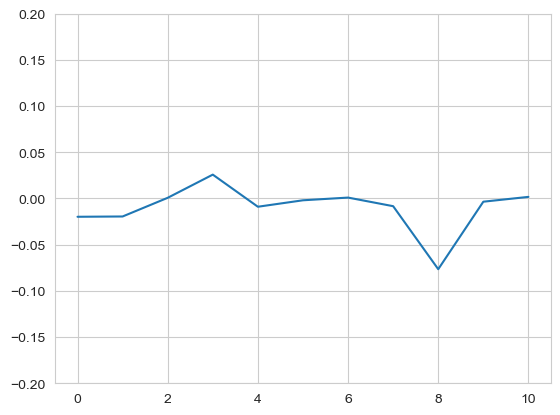

z_50_y_673_x_1220 468.0


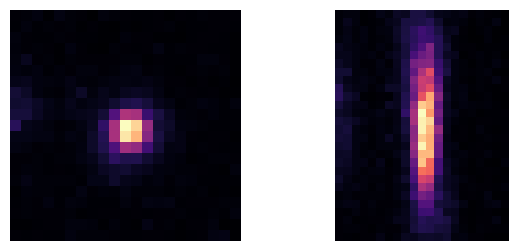

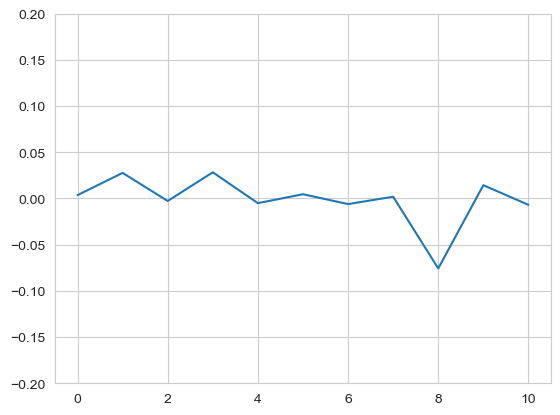

z_50_y_697_x_181 380.0


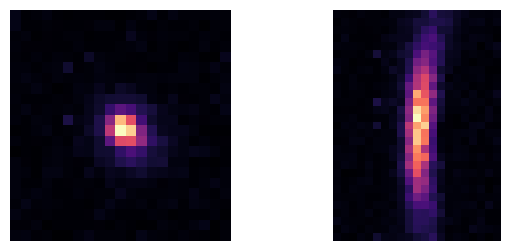

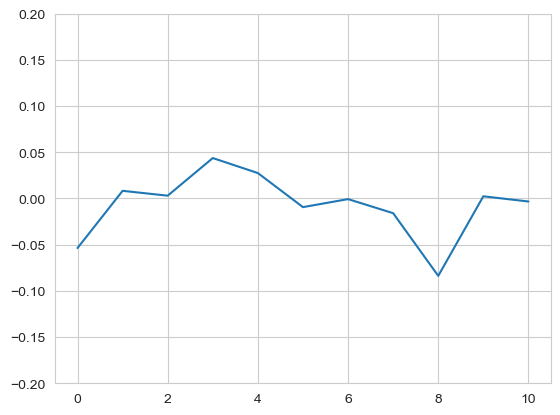

z_50_y_699_x_215 210.0


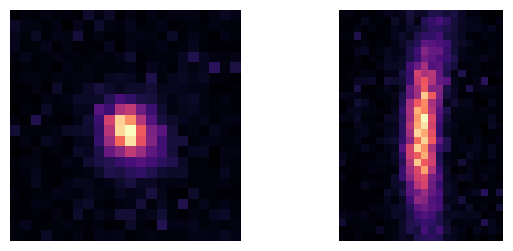

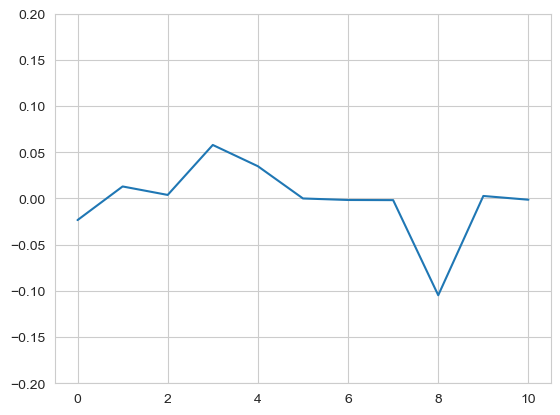

z_50_y_730_x_579 1022.0


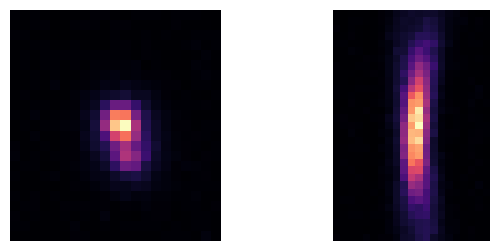

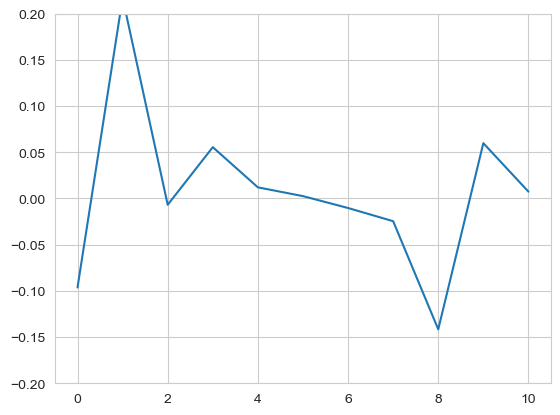

z_50_y_743_x_64 277.0


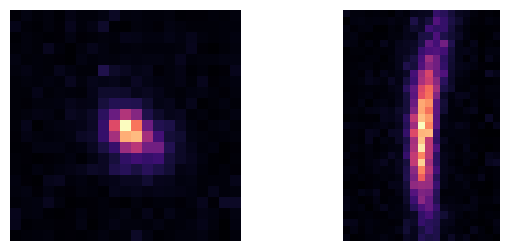

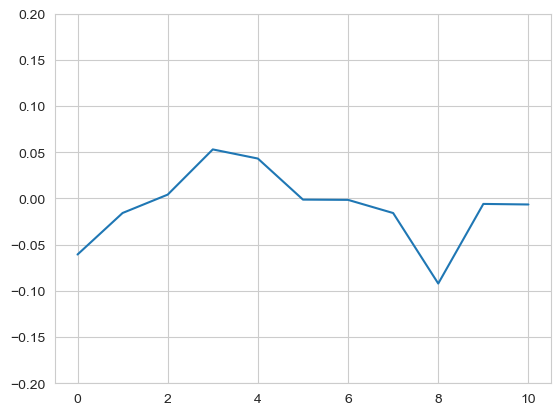

z_50_y_765_x_54 160.0


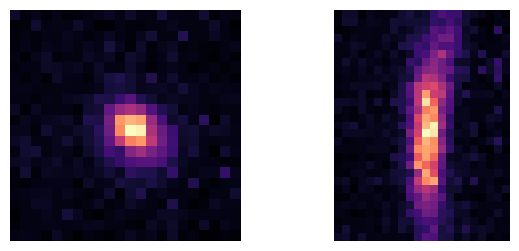

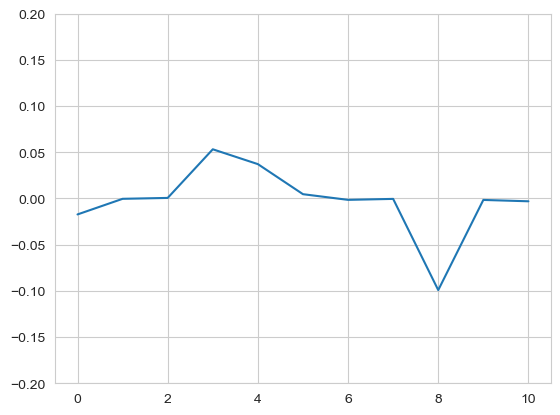

z_50_y_789_x_1250 645.0


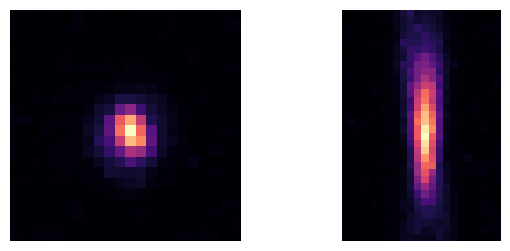

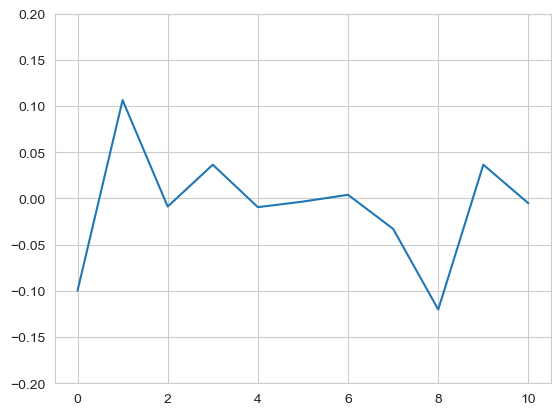

z_50_y_791_x_293 524.0


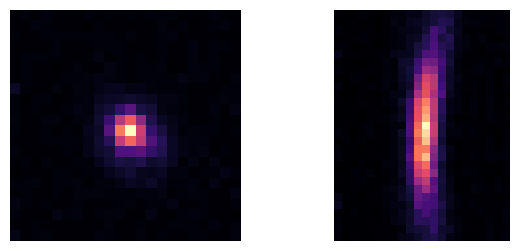

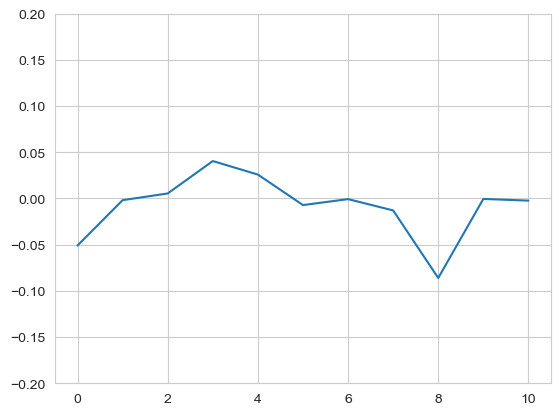

z_50_y_827_x_430 323.0


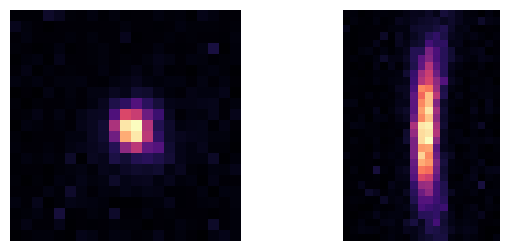

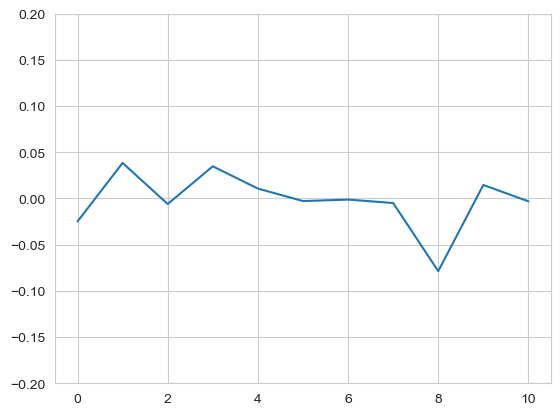

In [26]:
count = 0
for key,val in crops.items():
    count = count + 1
    print(key, np.max(val) - np.median(val))
    axs = show_patch(val)
    plt.plot(zola_full[key].values())
    plt.ylim(-0.2,0.2)
    plt.show()
    if count>50:
        break

# Plot the distribution

In [27]:
vals = np.array([list(z.values()) for z in zola_full.values()])
colum_name = ['astig_x','astig_y', 'vert_y', 'coma_y', 'coma_x', 'trefoil_x', 'quadrafoil_x', 'sec_astig_x', 'spherical', 'sec_astig_y', 'quadrafoil_y']
p1 = pd.DataFrame(data=vals, columns=colum_name)
df_c = pd.melt(p1)

In [ ]:
# plt.style.use('dark_background')
fig,axes = plt.subplots(1,1,figsize=(15,7))
# g = sns.violinplot(data =df_c, x='variable',y='value', inner='quartile');
# g = sns.swarmplot(data =df_c, x='variable',y='value');
g = sns.stripplot(data =df_c, x='variable',y='value');
plt.xticks(rotation=90, size=20)
plt.hlines(xmax=10.5, xmin=-0.5, y=0)
plt.xlabel("Zernike mode (ANSI order)", size=18)
plt.ylabel("Aberration amplitude in $\\mu$m",size=18)
plt.ylim(-0.3,0.3)
plt.yticks(size=20)
plt.tight_layout()
plt.show()
fig.savefig(f"{local_save_dir}/amplitude_distribution.png", transparent=True)

# Widths

In [ ]:
fwhm = get_xyz_widths(crops, unit=unit, headless=True)
print(f"Could measure {len(fwhm)} widths")

In [ ]:
# plot the histogram of widths
arr = np.array(list(fwhm.values()))
max_bin=5
n_bins = 20
bins = np.linspace(0,max_bin,n_bins);
colors = ('r','b','g')
names = ('FWHM_z','FWHM_y','FWHM_x')
for i,(a,c) in enumerate(zip(arr.T, colors)):
    sns.histplot(data=np.clip(a,bins[0], bins[-1]), bins=bins,kde=False, color=c, label=names[i]);
plt.legend() ;
plt.xlabel(r"FWHM in $\mu m$");
# plt.xlim(0.2,)
plt.savefig(f"{local_save_dir}/selected_widths.png")
np.save(f"{local_save_dir}/selected_widths.npy", arr)

# Aberration maps

In [ ]:
local_img_path

In [ ]:
from main import create_abb_map
create_abb_map(
        local_img_path, 
        zola_full, 
        scale_factor=(4,)*3
)

# RMSWE

In [ ]:
local_save_dir

In [ ]:
! ls "{local_save_dir}"

In [ ]:
find_rmswe(local_save_dir)